### Inspect filtering with ACAE  


In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# import JSON file
with open('/home/aogorodnikov/aae_filter_classes/classes_rgb_corrected_1k.json', 'r') as json_file:  
    data = json.load(json_file)

## Distributions  
Compare distributions of losses within classes

In [4]:
df = pd.DataFrame(data)
df['phenotype'] = df.image.str.split(pat='/', expand=True).iloc[:,4]

/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


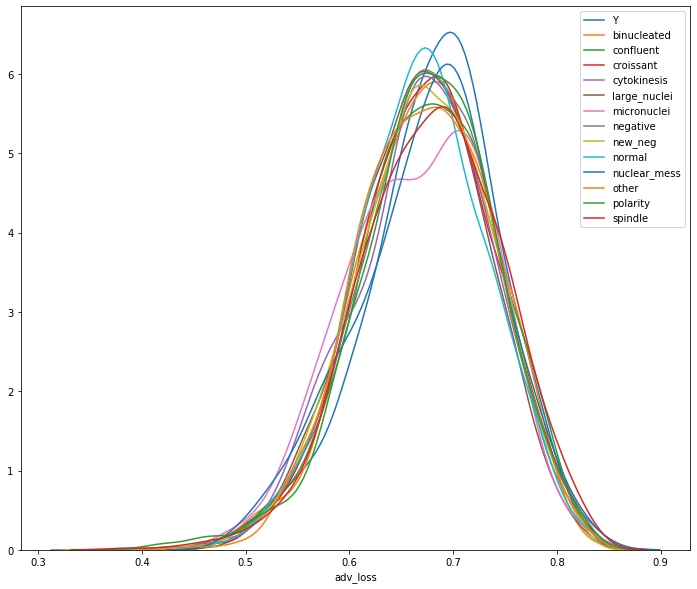

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(to_plot.adv_loss, hist=False, label=l)

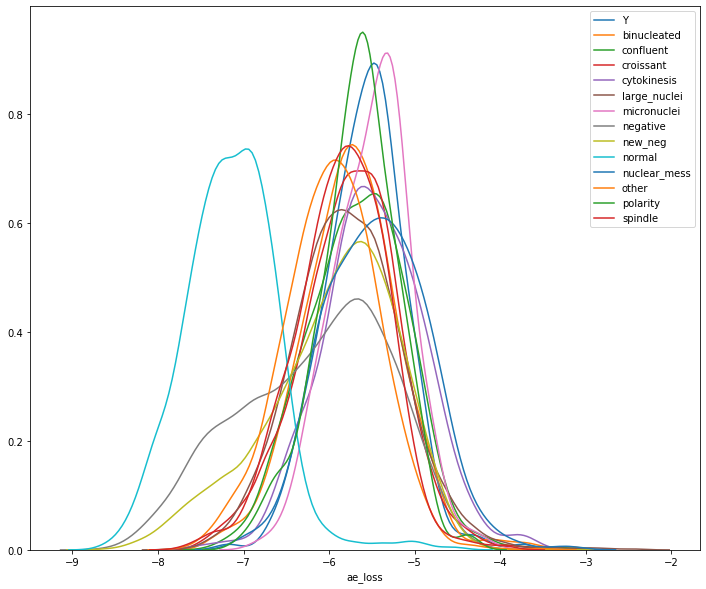

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(np.log(to_plot.ae_loss), hist=False, label=l)

In [16]:
to_plot = ['polarity', 'cytokinesis', 'negative']
df_sub = df[df.phenotype.isin(to_plot)]

In [17]:
df_sub.shape

(6489, 4)

(0, 0.007)

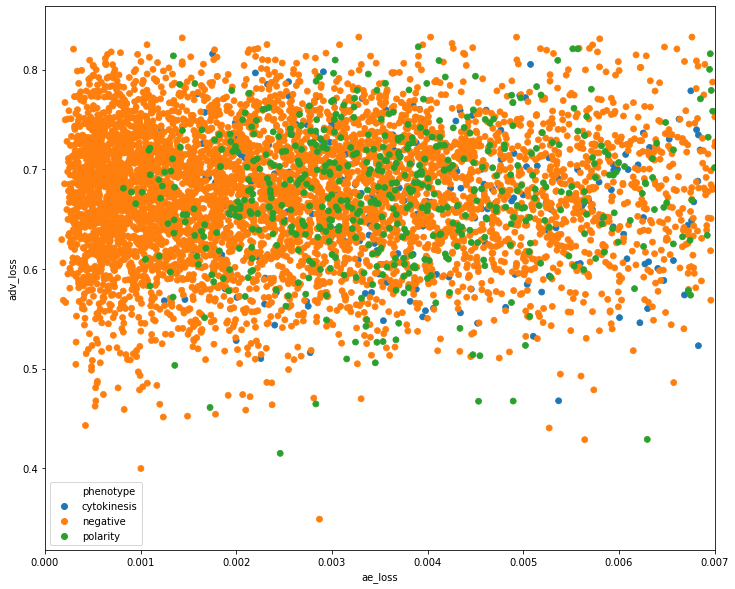

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))


ax = sn.scatterplot(df_sub.ae_loss, df_sub.adv_loss, hue=df_sub.phenotype, edgecolor=None)
ax.set_xlim(0,0.007)

In [14]:
pd.DataFrame(data['ae_loss']).describe()

,0
count,29056.000000
mean,0.003419
std,0.002764
min,0.000174
25%,0.001707
50%,0.002913
75%,0.004456
max,0.091711


In [15]:
pd.DataFrame(data['adv_loss']).describe()

,0
count,29055.000000
mean,0.672777
std,0.065189
min,0.348918
25%,0.629251
50%,0.674851
75%,0.718697
max,0.832555
